# Линейная регрессия 

Практическая работа по линейной регрессии

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Загрузка данных

Данные взяты с сайта Kaggle.com: https://www.kaggle.com/shivam2503/diamonds

In [3]:
data = pd.read_csv('../data/diamonds.csv', index_col=0).reset_index(drop=True)

In [4]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']


In [8]:
data[cat_cols].describe()

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


# EDA

Посмотрим на данные внимательнее.

In [9]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
num_cols = [col for col in data.columns\
            if data[col].dtype == 'float64'\
            or data[col].dtype == 'int64']


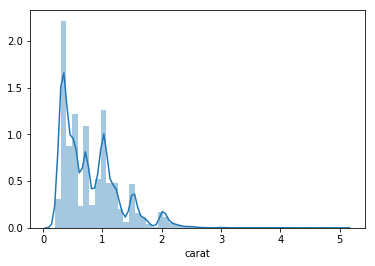

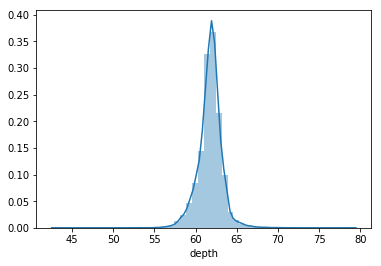

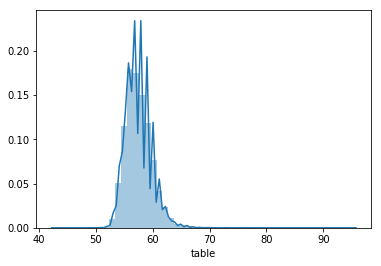

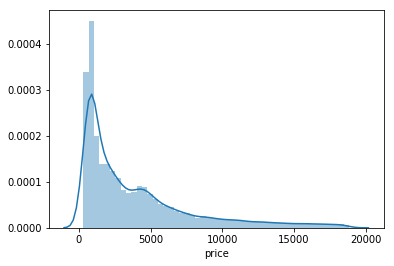

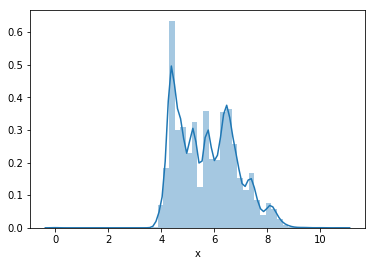

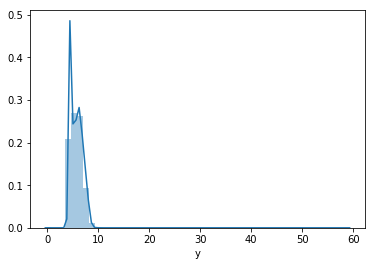

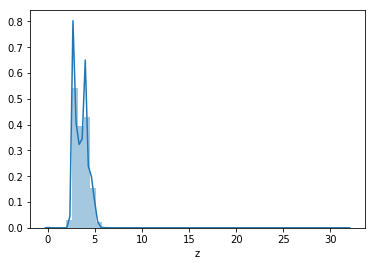

In [11]:
for col in num_cols:
    sns.distplot(data[col])
    plt.show()

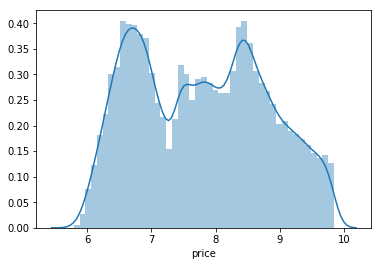

In [12]:
data['price'] = data['price'].apply(math.log1p)
sns.distplot(data['price'])

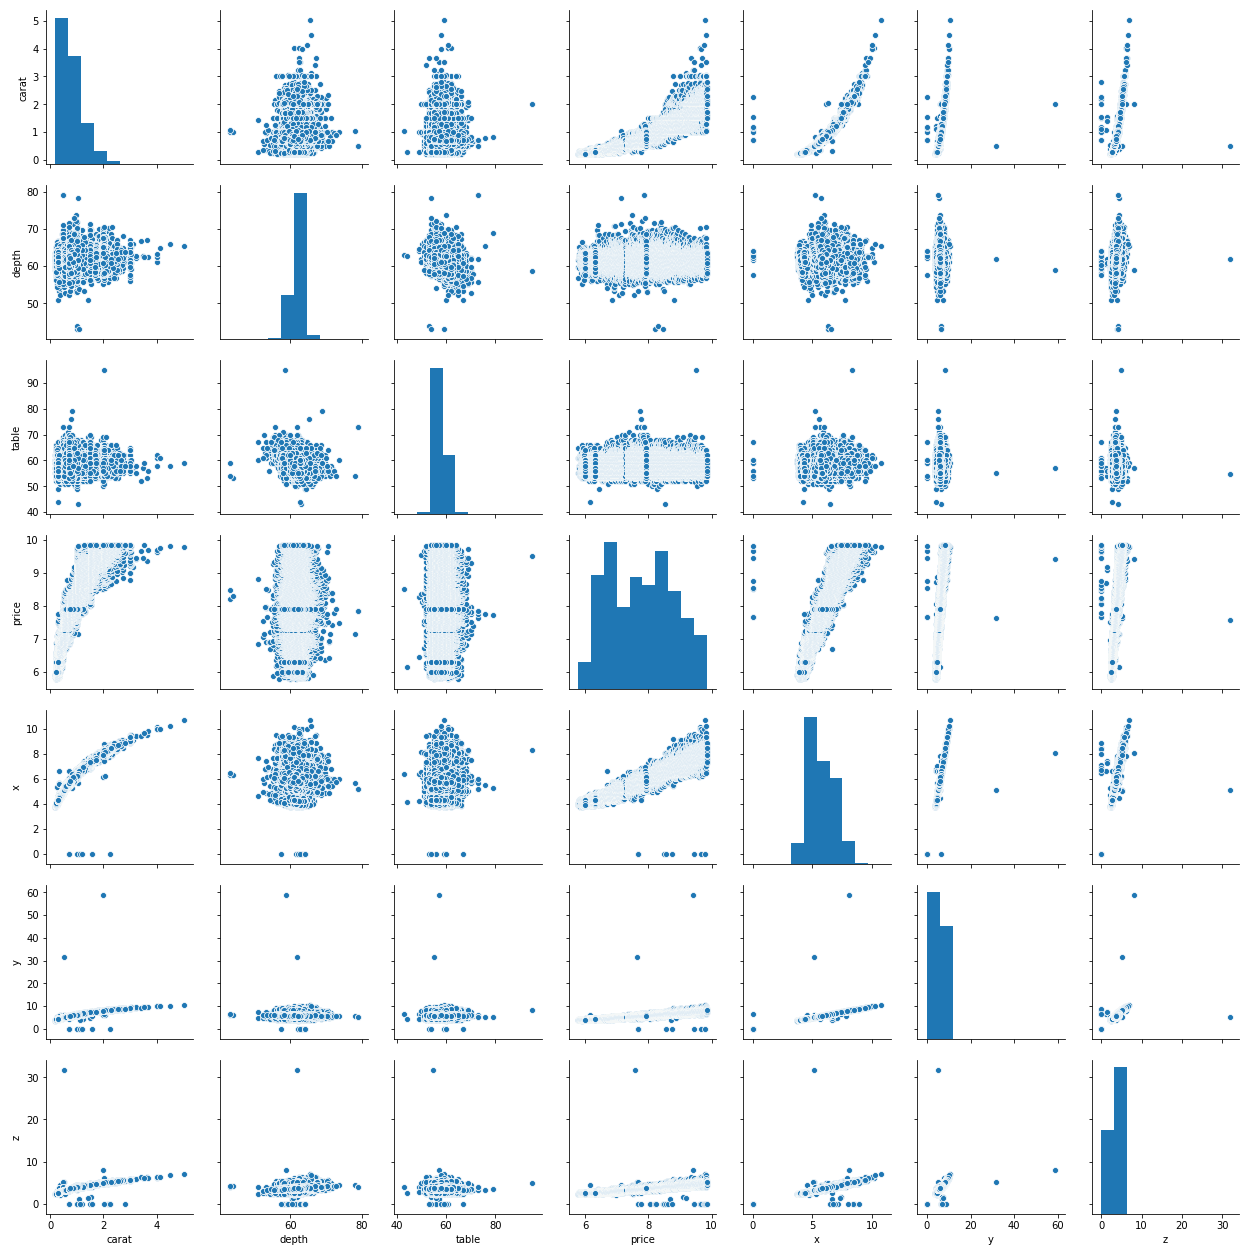

In [13]:
sns.pairplot(data[num_cols])

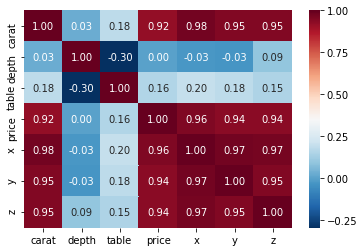

In [16]:
sns.heatmap(data[num_cols].corr(), cmap='RdBu_r', annot=True, fmt='.2f')

In [17]:
data.loc[data['y']>20, 'y'] = data.loc[data['y']<20, 'y'].mean()

In [18]:
data.loc[data['z']>20, 'z'] = data.loc[data['z']<20, 'z'].mean()

In [19]:
data.loc[data['x']<1, 'x'] = data.loc[data['x']>1, 'x'].mean()

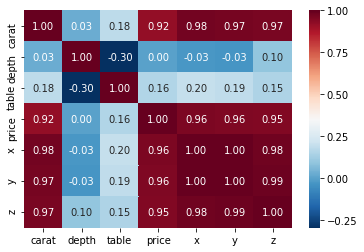

In [20]:
sns.heatmap(data[num_cols].corr(), cmap='RdBu_r', annot=True, fmt='.2f')

## Создание линейной модели

In [21]:
num_cols.remove('price')

In [22]:
X = data[num_cols]
y = data['price']

## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Тренировка модели

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Оценка модели

In [28]:
print(lm.intercept_)

-0.17812040961453945


In [29]:
coeff_df = pd.DataFrame(lm.coef_, num_cols, columns=['Coefficient'])
coeff_df['Coefficient_exp'] = coeff_df['Coefficient'].apply(lambda x: math.expm1(x))
coeff_df

,Coefficient,Coefficient_exp
carat,-1.052739,-0.651019
depth,0.030079,0.030536
table,-0.010103,-0.010052
x,1.156024,2.177276
y,0.135589,0.145211
z,0.035478,0.036115


In [30]:
predictions = lm.predict(X_test)

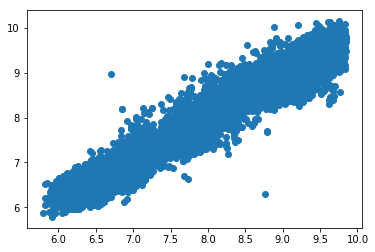

In [31]:
plt.scatter(x=y_test, y=predictions)

**Residual Histogram**

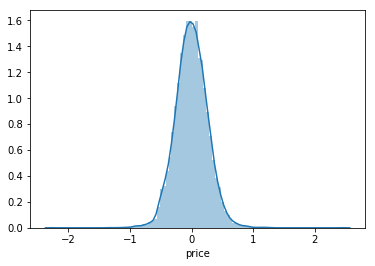

In [32]:
sns.distplot((y_test-predictions),bins=100);

In [33]:
def r2_adj(y_test, yhat, model=lm):
    SS_Residual = sum((np.array(y_test)-np.array(yhat))**2)
    SS_Total = sum((np.array(y_test)-np.mean(y_test))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    return 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [34]:
from sklearn import metrics

In [35]:
scores = pd.DataFrame(index = ['MAE', 'MSE', 'RMSE', 'R2_adj'])

In [36]:
predictions = [math.expm1(x) for x in predictions]
y_test = [math.expm1(x) for x in y_test]

mae = round(metrics.mean_absolute_error(y_test, predictions), 3)
mse = round(metrics.mean_squared_error(y_test, predictions), 3)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 3)
r2 = round(r2_adj(y_test, predictions), 3)

scores['mod1'] = [mae, mse, rmse, r2]

scores

,mod1
MAE,820.184
MSE,2262435.016
RMSE,1504.139
R2_adj,0.855


## Построим вторую модель 

С учетом категориальных фич

In [40]:
# Ваш код здесь

,mod1,mod2
MAE,820.184,439.189
MSE,2262435.016,767708.260
RMSE,1504.139,876.190
R2_adj,0.855,0.951
